# Intensity projections
clEsperanto brings some intensity projections which are also available with numpy. Let's see how numpy performs in comparison with our OpenCL stuff. When doing similar comparisons with ImageJ, we saw more performance benefits when GPU-accelerating 3D operations compared to 2D operations. https://clij.github.io/clij-benchmarking/benchmarking_operations_jmh

**Note:** benchmarking results vary heavily depending on image size, kernel size, used operations, parameters and used hardware. Use this notebook to adapt it to your use-case scenario and benchmark on your target hardware. If you have different scenarios or use-cases, you are very welcome to submit your notebook as pull-request!

In [1]:
import pyclesperanto_prototype as cle
import numpy as np
import time
import cupy as cp

# to measure kernel execution duration properly, we need to set this flag. It will slow down exection of workflows a bit though
cle.set_wait_for_kernel_finish(True)

# selet a GPU with the following in the name. This will fallback to any other GPU if none with this name is found
cle.select_device('RTX')

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

(120, 160, 160)


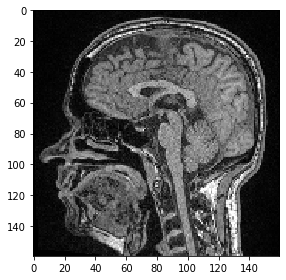

In [2]:
# test data
from skimage.io import imread, imshow

raw_image = imread('../data/Haase_MRT_tfl3d1.tif')

print(raw_image.shape)

# our test data is 3D but we show just a slice for visualisation purposes
imshow(raw_image[60])

## Maximum intensity projection in Z

clEsperanto maximum_intensity projection(Z) duration: 0.015002727508544922
clEsperanto maximum_intensity projection(Z) duration: 0.0010001659393310547
clEsperanto maximum_intensity projection(Z) duration: 0.0010001659393310547
clEsperanto maximum_intensity projection(Z) duration: 0.0010006427764892578
clEsperanto maximum_intensity projection(Z) duration: 0.0010004043579101562
clEsperanto maximum_intensity projection(Z) duration: 0.0
clEsperanto maximum_intensity projection(Z) duration: 0.0
clEsperanto maximum_intensity projection(Z) duration: 0.0010004043579101562
clEsperanto maximum_intensity projection(Z) duration: 0.0
clEsperanto maximum_intensity projection(Z) duration: 0.0


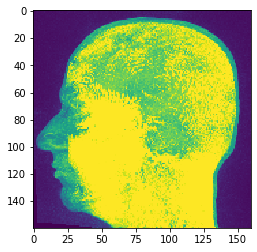

In [3]:
# maximum projection with clesperanto
result_image = None

test_image = cle.push(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = cle.maximum_z_projection(test_image, result_image)
    print("clEsperanto maximum_intensity projection(Z) duration: " + str(time.time() - start_time))

cle.imshow(result_image)

cupy maximum_intensity projection(Z) duration: 0.13910126686096191
cupy maximum_intensity projection(Z) duration: 0.0010001659393310547
cupy maximum_intensity projection(Z) duration: 0.0010006427764892578
cupy maximum_intensity projection(Z) duration: 0.0009999275207519531
cupy maximum_intensity projection(Z) duration: 0.0
cupy maximum_intensity projection(Z) duration: 0.0
cupy maximum_intensity projection(Z) duration: 0.0010001659393310547
cupy maximum_intensity projection(Z) duration: 0.0
cupy maximum_intensity projection(Z) duration: 0.0
cupy maximum_intensity projection(Z) duration: 0.0


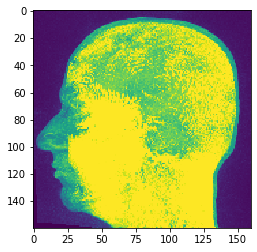

In [4]:
# maximum projection with cupy
result_image = None

test_image = cp.asarray(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = cp.max(test_image, axis=0, out=result_image)
    cp.cuda.stream.get_current_stream().synchronize() # we need to wait here to measure time properly
    print("cupy maximum_intensity projection(Z) duration: " + str(time.time() - start_time))

cle.imshow(result_image)

Numpy maximum_intensity projection(Z) duration: 0.0019998550415039062
Numpy maximum_intensity projection(Z) duration: 0.0030014514923095703
Numpy maximum_intensity projection(Z) duration: 0.0020008087158203125
Numpy maximum_intensity projection(Z) duration: 0.0019998550415039062
Numpy maximum_intensity projection(Z) duration: 0.002000570297241211
Numpy maximum_intensity projection(Z) duration: 0.0019998550415039062
Numpy maximum_intensity projection(Z) duration: 0.002001047134399414
Numpy maximum_intensity projection(Z) duration: 0.007001399993896484
Numpy maximum_intensity projection(Z) duration: 0.002000570297241211
Numpy maximum_intensity projection(Z) duration: 0.0020008087158203125


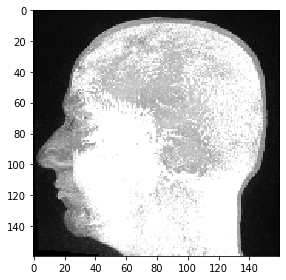

In [5]:
# maximum projection with numpy
result_image = None

test_image = np.asarray(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = np.max(test_image, axis=0, out=result_image)
    print("Numpy maximum_intensity projection(Z) duration: " + str(time.time() - start_time))
    
imshow(result_image)

## Maximum intensity projection in X

clEsperanto maximum_intensity projection(X) duration: 0.17185473442077637
clEsperanto maximum_intensity projection(X) duration: 0.0020008087158203125
clEsperanto maximum_intensity projection(X) duration: 0.0009999275207519531
clEsperanto maximum_intensity projection(X) duration: 0.0010004043579101562
clEsperanto maximum_intensity projection(X) duration: 0.0010001659393310547
clEsperanto maximum_intensity projection(X) duration: 0.0010001659393310547
clEsperanto maximum_intensity projection(X) duration: 0.0020003318786621094
clEsperanto maximum_intensity projection(X) duration: 0.0010006427764892578
clEsperanto maximum_intensity projection(X) duration: 0.0009999275207519531
clEsperanto maximum_intensity projection(X) duration: 0.0010001659393310547


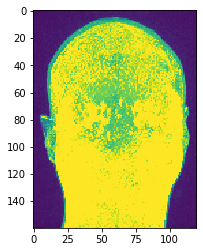

In [6]:
# maximum projection with clesperanto
result_image = None

test_image = cle.push(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = cle.maximum_x_projection(test_image, result_image)
    print("clEsperanto maximum_intensity projection(X) duration: " + str(time.time() - start_time))

cle.imshow(result_image)

Numpy maximum_intensity projection(X) duration: 0.0030002593994140625
Numpy maximum_intensity projection(X) duration: 0.00800180435180664
Numpy maximum_intensity projection(X) duration: 0.00601506233215332
Numpy maximum_intensity projection(X) duration: 0.0029916763305664062
Numpy maximum_intensity projection(X) duration: 0.002001047134399414
Numpy maximum_intensity projection(X) duration: 0.0019998550415039062
Numpy maximum_intensity projection(X) duration: 0.0020003318786621094
Numpy maximum_intensity projection(X) duration: 0.002000570297241211
Numpy maximum_intensity projection(X) duration: 0.002000570297241211
Numpy maximum_intensity projection(X) duration: 0.0020012855529785156


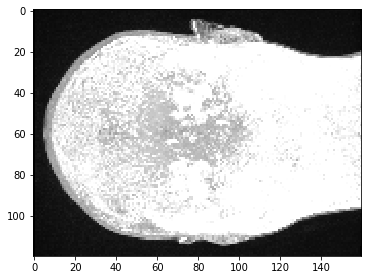

In [7]:
# maximum projection with numpy
result_image = None

test_image = np.asarray(raw_image)

for i in range(0, 10):
    start_time = time.time()
    result_image = np.max(test_image, axis=2, out=result_image)
    print("Numpy maximum_intensity projection(X) duration: " + str(time.time() - start_time))
    
imshow(result_image)